In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import*
from gaussxw import*

## Problema 1

In [2]:
V = 1e-3 #m³
p = 6.022e28
tetd = 428
Kb = 1.38e-23

In [3]:
def f(x):
    return (x**4)*(e**x)/((e**x - 1)**2)

def cv(T):
    n = 100
    a, b = 0, tetd/T
    c = 9*V*p*Kb*((T/tetd)**3)
    
    y, w = gaussxw(n)
    
    x = ((b-a)/2)*y + (b+a)/2
    wl = ((b-a)/2)*w
    soma = 0
    
    for k in range(n):
        soma += wl[k]*f(x[k])
    return c*soma

In [4]:
print(cv(100))

1152.7216478493658


Text(0, 0.5, 'calor específico(c)')

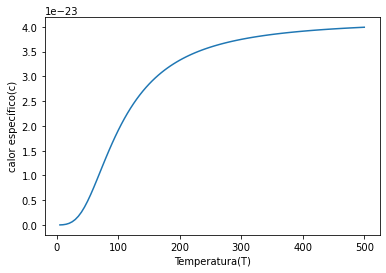

In [5]:
m = p*V
T = np.linspace(5,500,100)
res = []
for i in range(0,100):
    res.append(cv(T[i])/m)
    
plt.plot(T,res)
plt.xlabel('Temperatura(T)')
plt.ylabel("calor específico(c)")


## Problema 2


In [6]:
#b)
h = (6.6261e-34)/(2*pi)
c = 2.9979e8
cons = (Kb**4)/(4*(pi**2)*(c**2)*(h**3))
cons

8.71541300067064e-09

In [7]:
def f(t):
    return (t**3)/(((1-t)**5)*((e**(t/(1-t))-1)))

N = 50
a, b = 0, 1
y, w = gaussxw(N)
    
x = (((b-a))*y + (b+a))/2
wl = ((b-a)/2)*w
soma = 0
    
for k in range(N):
    soma += wl[k]*f(x[k])
res = soma
res

<ipython-input-7-2d9869062223>:2: RuntimeWarning: overflow encountered in double_scalars
  return (t**3)/(((1-t)**5)*((e**(t/(1-t))-1)))


6.493939400514872

Escolhi o método da quadratura de Gaussiana apenas porque caso eu utilizasse a regra do trapézio ou simpson, iria acabar tendo 
uma divisão por 0, e isso da um erro. Então a quadratura de Gaussiana foi a minha saída.

In [8]:
#c)
# valor da constante 5.67e-8
real = 5.67e-8
sig = res*cons
print("%.10f"%sig)

0.0000000566


In [9]:
(real-sig)/real

0.0018101609027403652

O erro fracionário comparado com o valor real é de 0,18%; um resultado bastante satisfatório.

## Problema 3

In [10]:
G = 6.674e-11
sig = 100

In [11]:
#b)
def f(x,y,z):
    return  1/((x**2 + y**2 + z**2)**1.5)

def F(z):
    N = 50
    a, b = -5, 5
    c = G*sig*z
    
    y, w = gaussxw(N)
    x = (((b-a))*y + (b+a))/2
    wl = ((b-a)/2)*w
    
    soma = 0
    for k in range(N):
        for i in range(N):
            soma += wl[k]*wl[i]*f(x[k], x[i], z)
    
    return c*soma

array([ 0.3       ,  0.3979798 ,  0.4959596 ,  0.59393939,  0.69191919,
        0.78989899,  0.88787879,  0.98585859,  1.08383838,  1.18181818,
        1.27979798,  1.37777778,  1.47575758,  1.57373737,  1.67171717,
        1.76969697,  1.86767677,  1.96565657,  2.06363636,  2.16161616,
        2.25959596,  2.35757576,  2.45555556,  2.55353535,  2.65151515,
        2.74949495,  2.84747475,  2.94545455,  3.04343434,  3.14141414,
        3.23939394,  3.33737374,  3.43535354,  3.53333333,  3.63131313,
        3.72929293,  3.82727273,  3.92525253,  4.02323232,  4.12121212,
        4.21919192,  4.31717172,  4.41515152,  4.51313131,  4.61111111,
        4.70909091,  4.80707071,  4.90505051,  5.0030303 ,  5.1010101 ,
        5.1989899 ,  5.2969697 ,  5.39494949,  5.49292929,  5.59090909,
        5.68888889,  5.78686869,  5.88484848,  5.98282828,  6.08080808,
        6.17878788,  6.27676768,  6.37474747,  6.47272727,  6.57070707,
        6.66868687,  6.76666667,  6.86464646,  6.96262626,  7.06

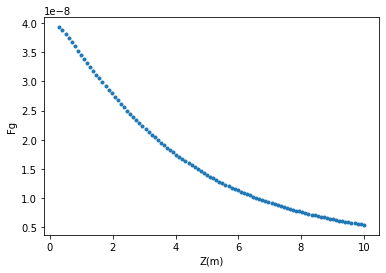

In [12]:
Fg = []
Z = np.linspace(0.3, 10, 100)

for i in range(0,100):
    Fg.append(F(Z[i]))
    
plt.plot(Z,Fg, '.')
plt.xlabel("Z(m)")
plt.ylabel("Fg")
Z